<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Lineal**

El **análisis de regresión**, especialmente la **regresión lineal**, se basa en varias suposiciones clave. Estas suposiciones son fundamentales para la validez de los resultados y conclusiones del análisis.

Estas suposiciones son cruciales para la interpretación adecuada y la validez de los resultados del análisis de regresión. Sin embargo, es importante recordar que en la práctica, es poco probable que todas estas suposiciones se cumplan perfectamente. En tales casos, se pueden aplicar técnicas de diagnóstico y métodos estadísticos alternativos para abordar las violaciones de estas suposiciones.

## **Suposiciones** principales:

1. **Relación Lineal**: La relación entre la variable dependiente y las variables independientes debe ser lineal. Esto significa que un cambio en una variable independiente se asocia con un cambio proporcional en la variable dependiente. Esta suposición se puede verificar visualmente usando diagramas de dispersión.

2. **Normalidad**: Se asume que los residuos (diferencias entre los valores observados y los valores predichos por el modelo) están distribuidos normalmente, especialmente en el contexto de las pruebas de hipótesis y la estimación de intervalos de confianza. La normalidad es menos crítica en grandes muestras debido al Teorema del Límite Central.

3. **No Multicolinealidad**: Las variables independientes no deben estar altamente correlacionadas entre sí. La multicolinealidad puede hacer que sea difícil aislar el efecto individual de una variable independiente y puede hacer que los coeficientes de la regresión sean inestables y difíciles de interpretar. Herramientas como el Factor de Inflación de la Varianza (VIF) pueden ayudar a detectar multicolinealidad.

4. **No Autocorrelación**: Los residuos no deben estar autocorrelacionados, especialmente importante en el análisis de series temporales. La autocorrelación puede ocurrir si los residuos en un período de tiempo están correlacionados con los residuos en otro período. La prueba de Durbin-Watson se utiliza comúnmente para detectar la autocorrelación.

5. **Varianzas Iguales (Homocedasticidad)**: Esta suposición implica que los residuos tienen varianzas constantes en diferentes niveles de las variables independientes. Si los residuos no tienen varianzas constantes (heterocedasticidad), puede afectar la eficiencia de los estimadores y hacer que las pruebas de hipótesis sean menos fiables. Las pruebas como la de Breusch-Pagan y los gráficos de residuos versus valores ajustados se utilizan para verificar la homocedasticidad.

Tomado de: Octavio Gutiérrez de Código Máquina. URL del canal: https://www.youtube.com/CodigoMaquina. URL del video: https://youtu.be/1CGbP0l0iqo

# Contexto  y Datos

In [46]:
import pandas as pd

# Cargar el archivo
file_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/ingreso.csv'
data = pd.read_csv(file_path)

# Definir el nuevo salario por hora
salario_por_hora = 9.25

# Calcular el nuevo ingreso total
data['ingreso'] = (((data['ingreso'] / data['horas']) * salario_por_hora))/4

data = data.to_csv('ingreso_pr.csv')


In [33]:
import pandas as pd

datos = pd.read_csv("https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/ingreso_pr.csv", index_col=0)
datos


,ingreso,horas
0,563.833991,40.905476
1,498.416894,41.576483
2,415.775657,41.369239
3,671.689701,41.537211
4,531.584483,40.441203
...,...,...
995,562.427268,41.110352
996,390.972727,40.617061
997,553.072761,40.798085
998,616.242814,41.443604


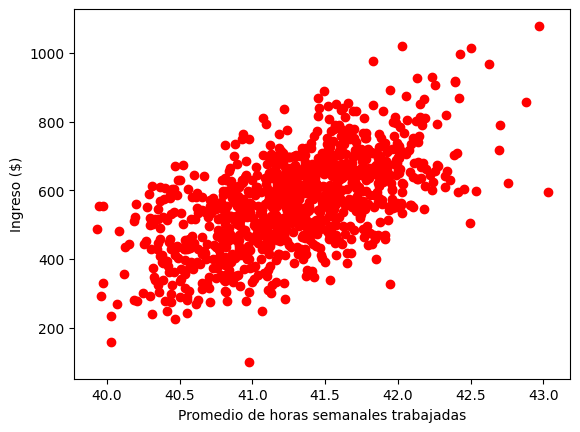

In [47]:
import matplotlib.pyplot as plt

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="red")
plt.show()

# Creación del Modelo de
# Regresión Lineal Simple

Intersección (b) -5723.213205243898
Pendiente (m) [152.3114758]


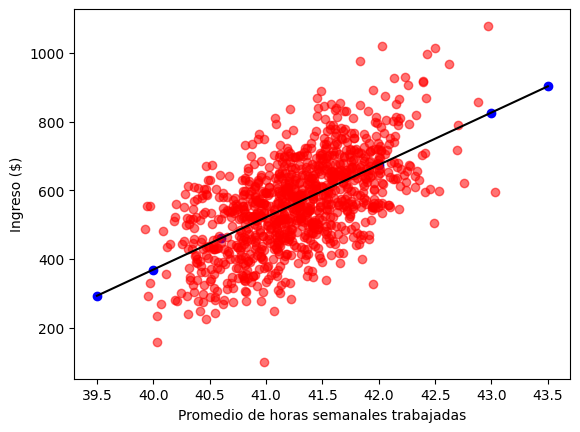

In [48]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

horas = datos["horas"].values.reshape((-1, 1))

modelo = regresion.fit(horas, datos["ingreso"])

print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

entrada = [[39.5], [40], [40.6], [42], [43], [43.5]]
modelo.predict(entrada)

plt.scatter(entrada, modelo.predict(entrada), color="blue")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="red", alpha=0.55)
plt.show()
